<a href="https://colab.research.google.com/github/Sumith-Pevekar/AmazonAlexaReviewSentimentAnalysis/blob/main/Amazon_Alexa_Review_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import os
import re
from string import punctuation
from textblob import Word
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [15]:
data = pd.read_csv('/content/drive/MyDrive/AlexaReviewsDataset/amazon_alexa.tsv',sep='\t')
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [16]:
data.columns = data.columns.str.replace('verified_reviews', 'reviews')


In [17]:
data.isna().sum()


rating       0
date         0
variation    0
reviews      0
feedback     0
dtype: int64

In [18]:
data.drop(['date','variation'],axis=1,inplace=True)
data.head()

,rating,reviews,feedback
0,5,Love my Echo!,1
1,5,Loved it!,1
2,4,"Sometimes while playing a game, you can answer...",1
3,5,I have had a lot of fun with this thing. My 4 ...,1
4,5,Music,1


In [19]:
data = data[data.rating != 3]


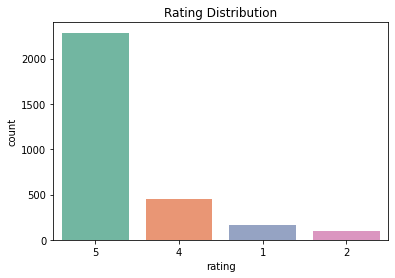

In [20]:
sns.set_palette(sns.color_palette('Set2'))
sns.countplot(
x='rating',
data=data,
order=data.rating.value_counts().index
)
plt.xlabel("rating")
plt.title("Rating Distribution");

In [21]:
def score_sentiment(score):
    if(score == 1 or score == 2):
        return 0
    else:
        return 1
data.rating = data.rating.apply(score_sentiment)

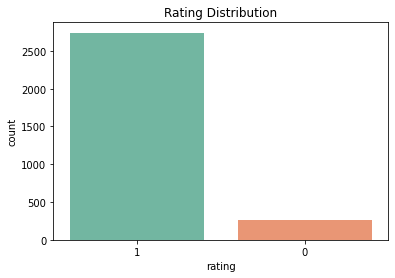

In [22]:
sns.set_palette(sns.color_palette('Set2'))
sns.countplot(
x='rating',
data=data,
order=data.rating.value_counts().index
)
plt.xlabel("rating")
plt.title("Rating Distribution");

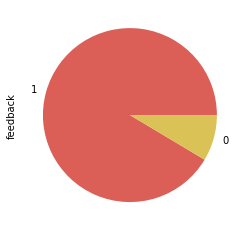

In [23]:
sns.set_palette(sns.color_palette("hls", 8))
data.feedback.value_counts().plot.pie()

In [24]:
data.drop('feedback',axis=1,inplace=True)


In [25]:
def clean(df):
  df['reviews']=df['reviews'].apply(lambda words:re.sub('<.*?>','',words))
  df['reviews']=df['reviews'].apply(word_tokenize)
  df['reviews']=df['reviews'].apply(lambda words: [x.lower() for x in words])
  df['reviews'] = df['reviews'].apply(lambda words: [x for x in words if not x in punctuation])
  df['reviews'] = df['reviews'].apply(lambda words: [x for x in words if not x.isdigit()])
  df['reviews'] = df['reviews'].apply(lambda words: [x for x in words if x not in stopwords.words('english')])
  temp = df['reviews'].apply(lambda words: " ".join(words))
  freq = pd.Series(temp).value_counts()[:10]
  df['reviews'] = df['reviews'].apply(lambda words: [x for x in words if x not in freq.keys()])
  df['reviews'] = df['reviews'].apply(lambda words: " ".join([Word(x).lemmatize() for x in words]))
  return df


In [26]:
data = clean(data)
data.head()

,rating,reviews
0,1,echo
1,1,loved
2,1,sometimes playing game answer question correct...
3,1,lot fun thing yr old learns dinosaur control l...
4,1,music


For Positive reviews


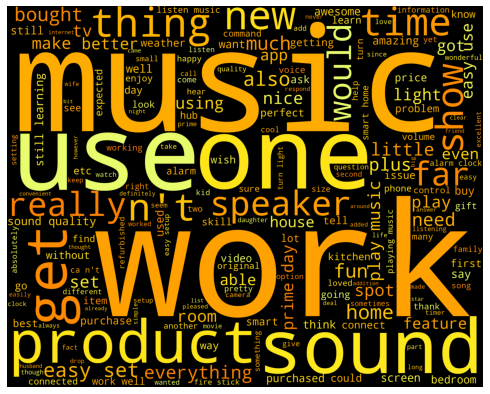

For Negative reviews


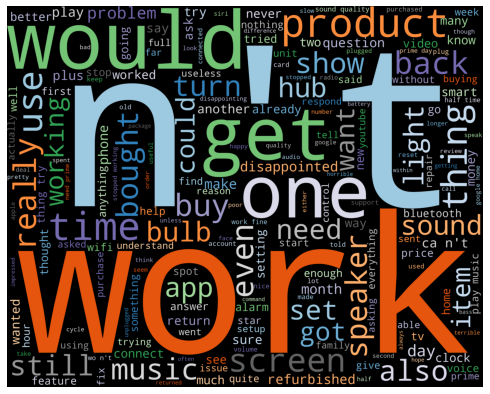

In [27]:
def wordcloud_draw(data, colormap):
    words = ' '.join(data)
    wordcloud = WordCloud(stopwords=stopwords.words('english')+  ['amazon','alexa','echo','dot','device'],
    colormap=colormap,
    width=2500,
    height=2000
    ).generate(words)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

positivedata = data[data['rating'] == 1]
positivedata =positivedata['reviews']
negdata = data[data['rating'] == 0]
negdata= negdata['reviews']

print("For Positive reviews")
wordcloud_draw(positivedata,colormap='Wistia')
print("For Negative reviews")
wordcloud_draw(negdata,colormap='tab20c')


In [28]:
X = data['reviews']
Y = data['rating']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [29]:
clf = Pipeline(steps =[
('preprocessing', CountVectorizer()),
('classifier', DecisionTreeClassifier(class_weight='balanced'))
])
clf.fit(x_train,y_train)

Pipeline(steps=[('preprocessing', CountVectorizer()),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced'))])

In [30]:
clf.score(x_test,y_test)


0.8222222222222222

In [31]:
x_test


1686    absolutely thing amazon echo show went bonkers...
260           alexa throughout house -- -- future arrived
285     's efficient amazing cool use often every day ...
2377    disappointed mandatory upgrade final got done ...
1833                             sound nice perfect price
                              ...                        
2518                     wish volume capable going louder
8                                                    look
1351    echo spot really got easy set one problem adve...
1314    much knew bought pretty much run house help fa...
1867    coop product many us including smart device th...
Name: reviews, Length: 900, dtype: object

In [32]:
clf.predict(x_test)


array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,